<a href="https://colab.research.google.com/github/mohamedelziat50/Hotel-Bookings-AI-MIU/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Project - Machine Learning Pipeline on an Hotel Bookings Dataset

## Import The Neccesary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#Genetic Algorithm
from sklearn.metrics import f1_score
import random

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


## Read The Dataset
Upload through files in colab.

Note: The target variable for prediction is `is_canceled`.

In [4]:
df = pd.read_csv('/content/hotel_bookings.csv')

## Display a portion of the data
Check data info (column datatypes and number of non null values)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Display first 5 rows using pandas

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,27:32.5,Lucknow


Display last 5 rows using pandas

In [7]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,33:06.0,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,55:18.4,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,50:23.0,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,37:40.4,Ahmedabad
119389,City Hotel - Bhopal,0,205,2024,December,51,21,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,11:08.1,Bhopal


## A. Data Preprocessing & Cleaning
Anaylze the dataset's shape:
- 119390 rows (records)
- 33 columns (features) - including target feature

In [8]:
print("Dataset's shape:", df.shape)

Dataset's shape: (119390, 33)


### 1. Detect Missing Values
Display a table representing nulls (feature -> corresponding records with nulls)

- .isnull(): Returns a boolean mask of True & False values
- .sum(): Counts the True values in each column/feature

In [9]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Table shows the features with nulls are:
-   children (4)
-   country (488)
-   agent (16340)
-   company (112593)

To determine whether or not we drop a column/feature:
- Divide the number of nulls over total number of records, to get the percentage
- Set a threshold (50%) for null values (if above handle nulls)

In [10]:
(df.isnull().sum() / df.shape[0]) * 100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


Because `company` has threshold more than 50% (94.3%), we should delete (drop) whole column

axis=1: Operation should be performed on the columns (vertical axis). The default value for axis is 0 (rows - horizontal axis).


**Note**: the other columns still need to be handled through an **imputer** later.

In [11]:
df = df.drop('company', axis=1)

### 2. Handle Unique & Identical Value Columns
Count the number of unique values in each column to check whether:
- The values are all unique (no pattern to be found in the data)
- The values are all the same (not useful - identical)

nunique(): counts the number of unique non-null values

In [12]:
print(f"Note: the dataset has {df.shape[0]} rows.")
unique_counts = df.nunique()
unique_counts

Note: the dataset has 119390 rows.


,0
hotel,30
is_canceled,2
lead_time,479
arrival_date_year,1
arrival_date_month,12
arrival_date_week_number,52
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


Because the `arrival_date_year` column has only 1 unique value, no pattern can be detected from it, **so we will drop it as its not necessary.**

In [13]:
df = df.drop('arrival_date_year', axis=1)

### 3. Handle Duplicate Values
.duplicated(): used to find duplicate rows

np.int64(0) indicates that no duplicate values exist, so no duplicates to be removed

In [14]:
print("Duplicated Columns:", df.duplicated().sum())

Duplicated Columns: 0


### 4. Handle Garbage Values
Garbage values: incorrect, unexpected data

Identified by simply eyeballing the value & noticing if anything is out of place or unexpected.

In [15]:
# Identifying garbage values in `string` objects
for feature in df.select_dtypes(include = "object").columns:
    print("=" * 10, "Feature:", feature, "=" * 10)
    print(df[feature].value_counts()) # Displays a value and it's count
    print() # New Line

========== Feature: hotel ==========
hotel
City Hotel - Ahmedabad       5405
City Hotel - Bhopal          5367
City Hotel - Jaipur          5343
City Hotel - Pune            5343
City Hotel - Kolkata         5339
City Hotel - Hyderabad       5339
City Hotel - Goa             5297
City Hotel - Chandigarh      5293
City Hotel - Lucknow         5290
City Hotel - Mumbai          5265
City Hotel - Delhi           5252
City Hotel - Chennai         5251
City Hotel - Bangalore       5210
City Hotel - Indore          5170
City Hotel - Kochi           5166
Resort Hotel - Bhopal        2737
Resort Hotel - Delhi         2726
Resort Hotel - Kochi         2723
Resort Hotel - Jaipur        2695
Resort Hotel - Bangalore     2687
Resort Hotel - Chandigarh    2685
Resort Hotel - Goa           2676
Resort Hotel - Chennai       2674
Resort Hotel - Mumbai        2670
Resort Hotel - Indore        2657
Resort Hotel - Pune          2649
Resort Hotel - Hyderabad     2642
Resort Hotel - Kolkata       2637
Resor

The feature `previous_bookings_not_canceled` has become all zeros after outlier handling, so it should be reconsidered in our analysis.  
The following features exhibit the same issue: `children`, `babies`, `previous_cancellation`, `booking_changes`, and `days_in_waiting_list`.


In [16]:

print("=" * 10, "previous_bookings_not_canceled:", feature, "=" * 10)
print(df['previous_bookings_not_canceled'].value_counts()) # Displays a value and it's count
print() # New Line

========== previous_bookings_not_canceled: city ==========
previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
68         1
69         1
70         1
71         1
72         1
Name: count, Length: 73, dtype: int64



Fields containing garbage values:
- `meal` has 1169 'Undefinded'
- `market_segment` has 2 'Undefined'
- `distribution_channel` has 5 'Undefined'

**So we have to replace it with null.** (Then **impute** later)

In [17]:
# Replace 'undefined' with NaN in specific columns: 'meal', 'market_segment' and 'distribution_channel'
df['meal'] = df['meal'].replace('Undefined', np.nan)
df['market_segment'] = df['market_segment'].replace('Undefined', np.nan)
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', np.nan)

# Check whether they were removed.
print(df["meal"].value_counts())
print()
print(df["market_segment"].value_counts())
print()
print(df["distribution_channel"].value_counts())

meal
BB    92310
HB    14463
SC    10650
FB      798
Name: count, dtype: int64

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Name: count, dtype: int64


### 5. Detect Outliers
.describe(): Descriptive statistics to understand more about the data

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


We identified the columns that have outliers through:
- Difference between `75%` and `max` is SIGNIFICANT (Higher Outliers)
- Difference between `50%` (median) and `mean` is SIGNIFICANT
- Difference between `25%` and `min` is SIGNIFICANT (**NOT IMPLEMENTED YET**, DOUBLE CHECK FIRST - Lower Outliers)

Features with outliers (all with **right skew**):
*   Lead_time
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   previous_cancellations
*   previous_bookings_not_canceled
*   booking_changes
*   days_in_waiting_list
*   agent (Booking agent ID - categories)
*   adr (-ve value minimum - that's wrong)

Descripitive statistics for `string` values aswell

In [19]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city
count,119390,119390,118221,118902,119388,119385,119390,119390,119390,119390,119390,119390,119390
unique,30,12,4,177,7,4,10,12,3,4,3,34552,15
top,City Hotel - Ahmedabad,October,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10:59.8,Bhopal
freq,5405,10349,92310,48590,56477,97870,85994,74053,104641,89613,75166,14,8104


#### Visualization Function
Created a visualization function to avoid repeated code, just specify type of diagram needed to be displayed.

Assumes 18 Features, So keep that in mind! (not generic)

Matplotlib Syntax:
- plt.subplot(2, 3, i)  # 2 rows, 3 columns, current index

In [20]:
def visualize_diagram(diagram_name):
    # Intialize rows and columns (6 rows with 3 plots per row)
    rows = 6
    columns = 3

    # Create the big plot with specific dimensions
    plt.figure(figsize=(5 * columns, 4 * rows))

    # Iterate over the features & create the histograms
    for i, col in enumerate(numeric_columns):
        plt.subplot(rows, columns, i + 1) # +1 because Matplotlib starts from index 1 in the plots
        if diagram_name == "Histogram":
            sns.histplot(data=df, x=col)
        elif diagram_name == "Boxplot":
            sns.boxplot(data=df, x=col)

    plt.tight_layout()
    plt.show()

#### Histogram Visualization
Histogram to understand data distribution (numeric columns)

In [21]:
# Select numeric columns - returns a list (not dateframe)
numeric_columns = df.select_dtypes(include="number").columns

# Store the numeric columns length (18 features)
numeric_columns_length = len(numeric_columns)

print("Number of numeric columns/features:", numeric_columns_length)

Number of numeric columns/features: 18


Some distributions appear to be 'skewed' because of outliers.

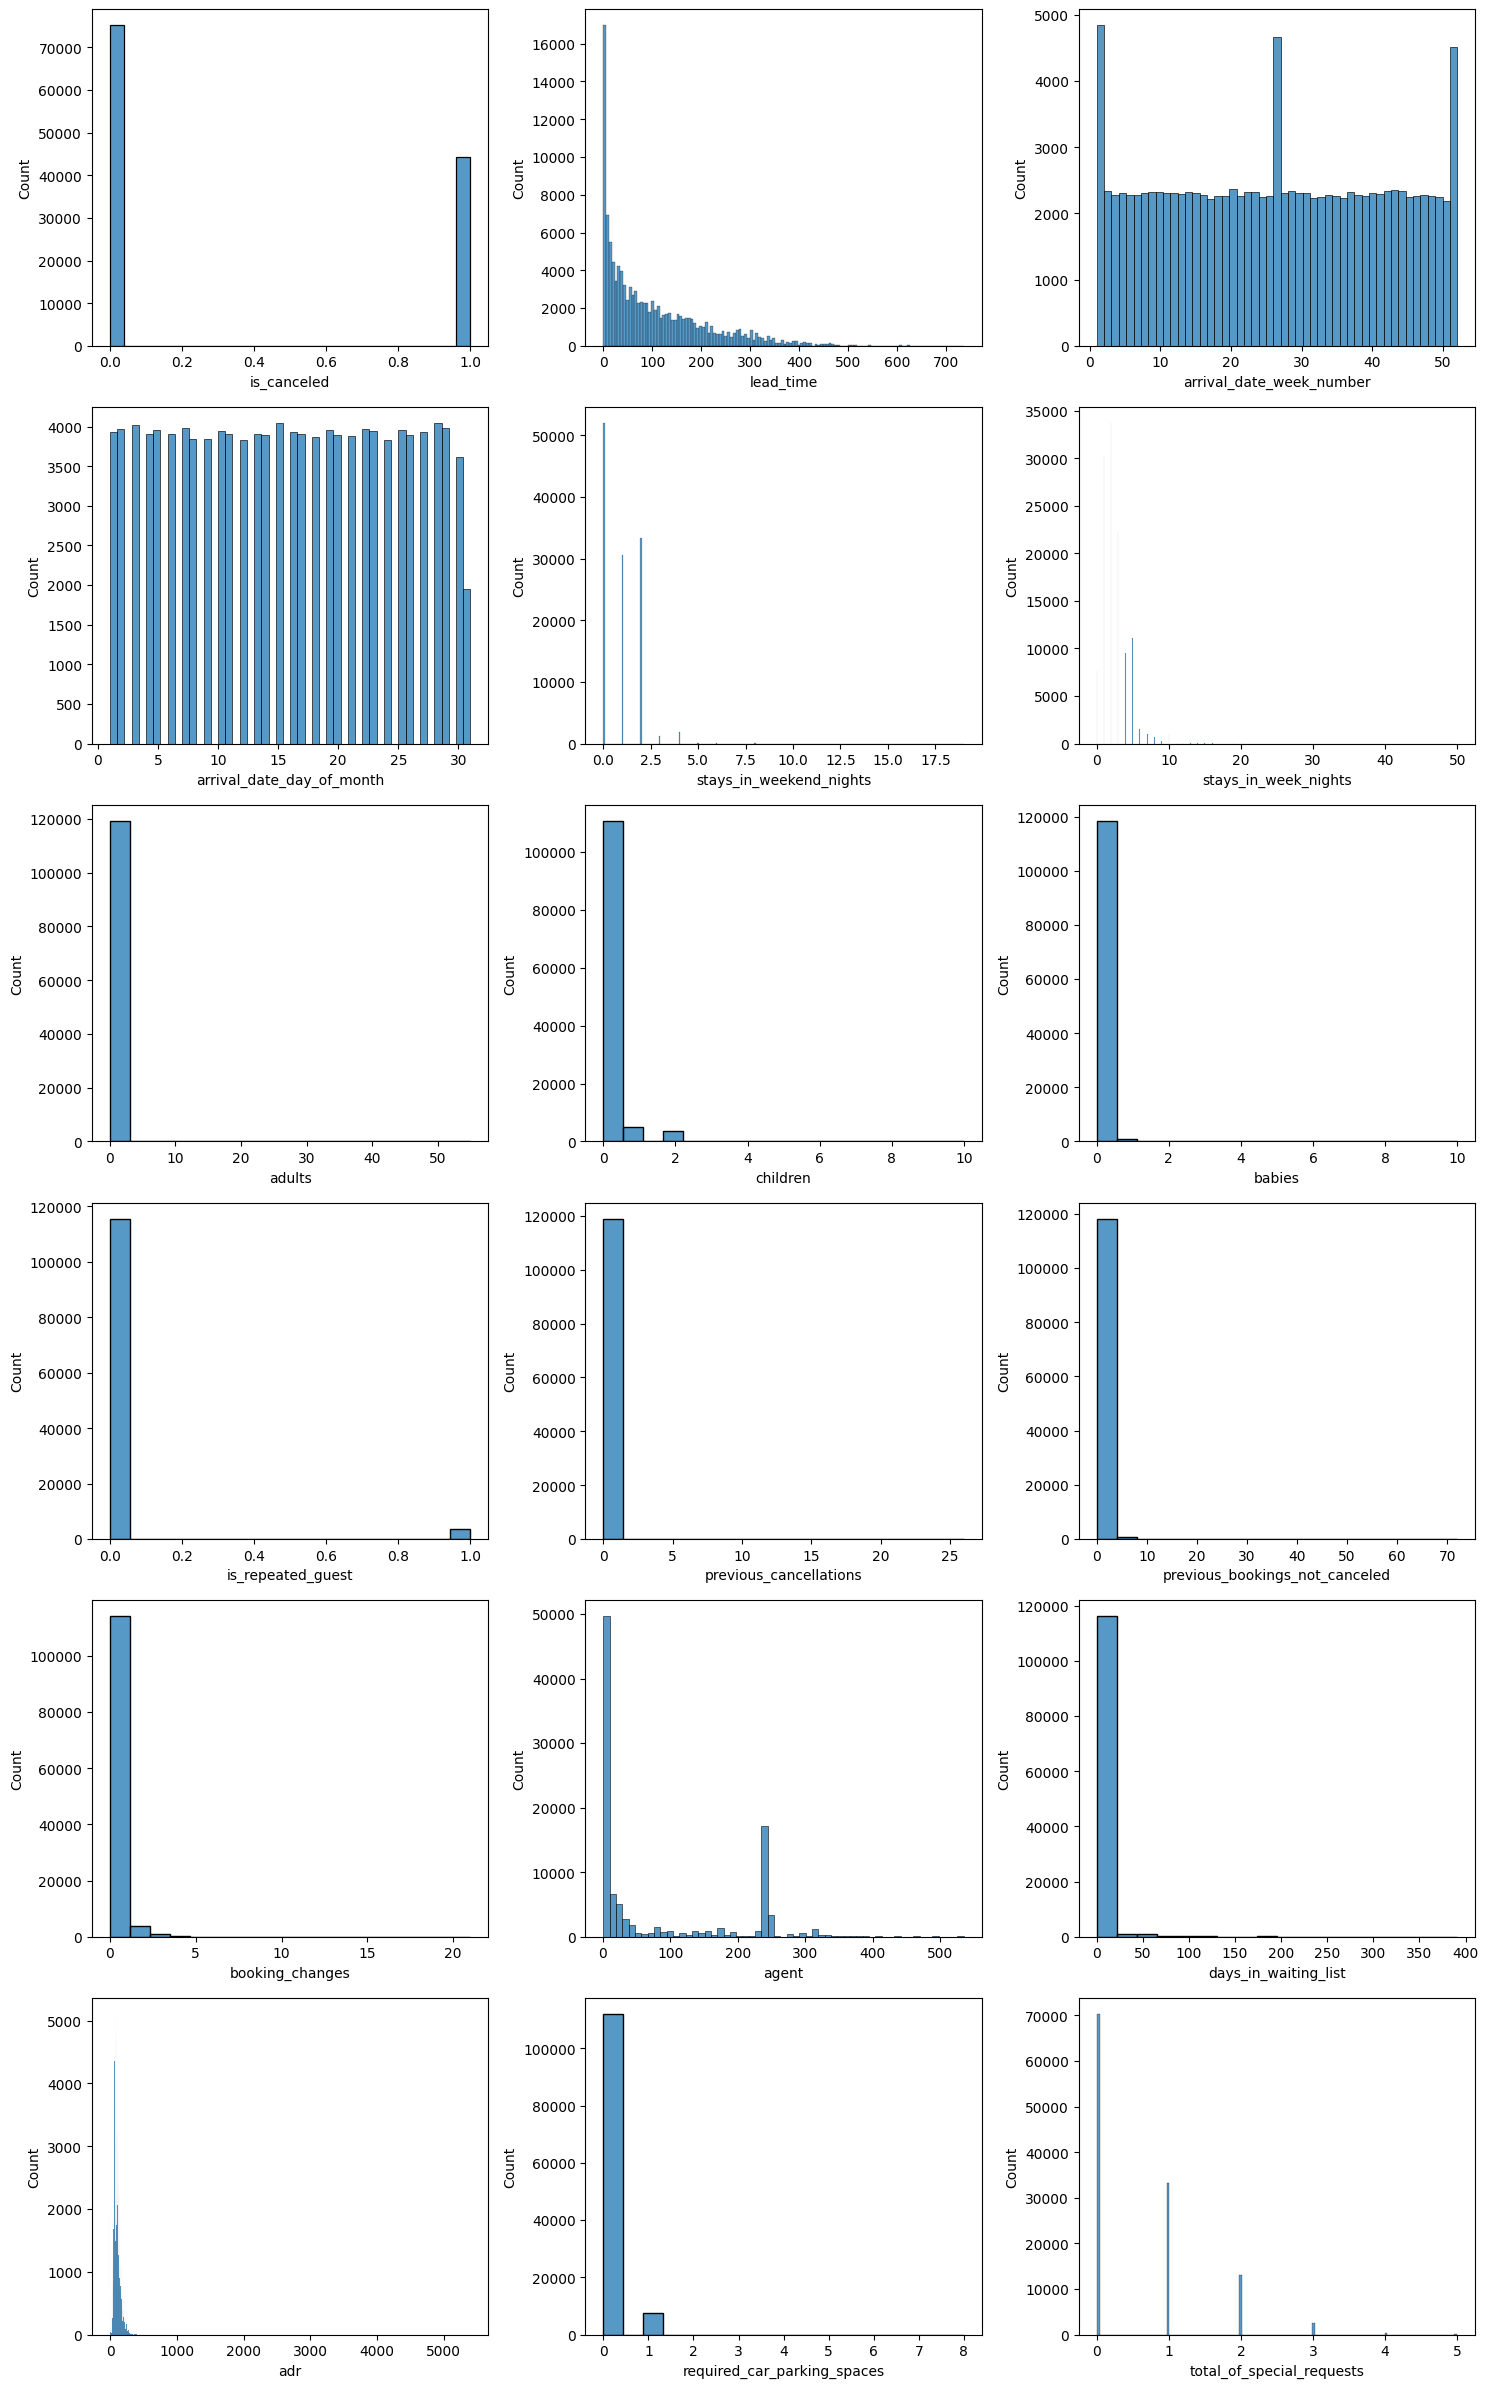

In [22]:
visualize_diagram("Histogram")

#### Boxplot Visualization
To identify outliers visually through the whiskers

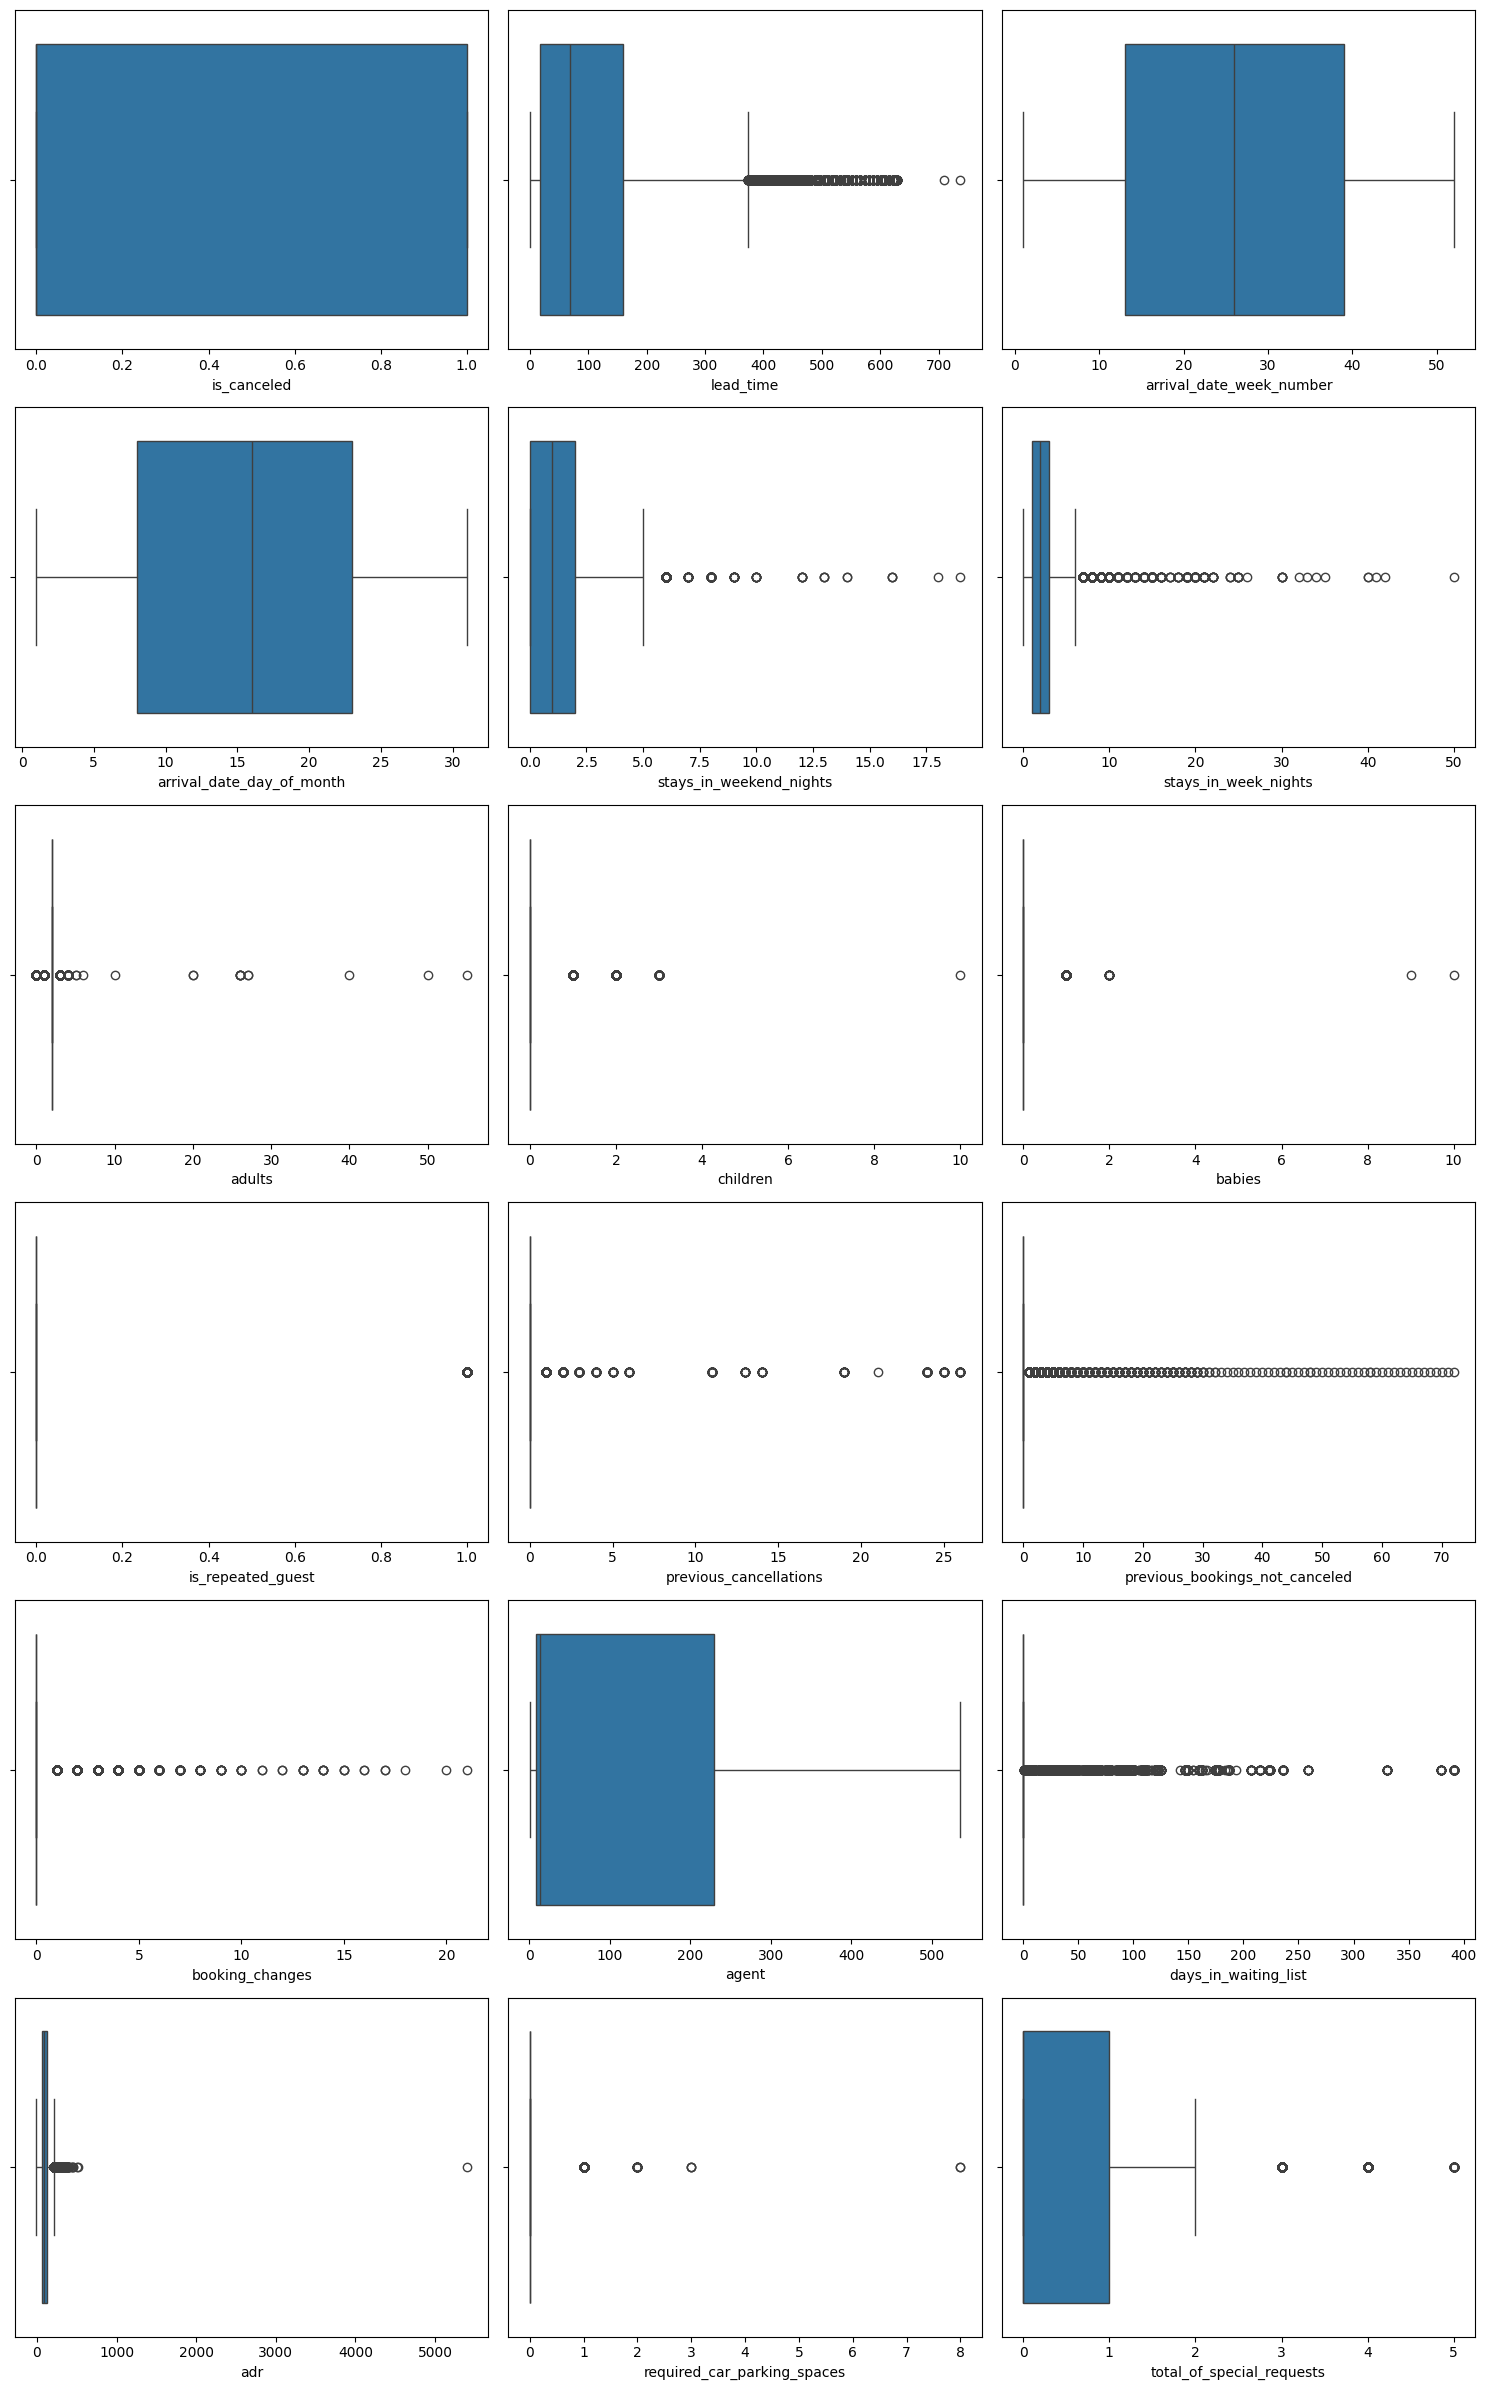

In [23]:
visualize_diagram("Boxplot")

### 6. Fix Impossible Values (After understanding)
adr: Average Daily Rate (price per room per day)

Why **negative** price is **WRONG**: Hotels cannot charge negative prices (so it's probably a data entry error)

Set minimum to be zero.

In [24]:
df['adr'] = df['adr'].clip(lower=0)  # Negative price is WRONG

### 7. Impute (Handle Missing Values)

Note: target is never imputed, as it will lead to misleading results. Thus, we immediatly drop any null values.

Detected Missing Value Columns:
- children (4) - Numerical
- country (488) - Text
- agent (16340) - Numerical

Imputing the numeric values with the median

In [25]:
for col in ['children','agent']:
  if col in df.columns:
    df[col] = df[col].fillna(df[col].median())

Imputing the `string` objects' with the mode

`market_segment`,`distribution_channel`, `meal` had garbage values that were replaced with NaN, so we impute them aswell.

In [26]:
for col in ['country','market_segment','distribution_channel','meal']:
    if df[col].isnull().any(): # Check if the column has any null values
        df[col] = df[col].fillna(df[col].mode()[0])

Check whether there are any missing values (last time)

In [27]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


### 8. Fix incorrect data types
Can't have 2.5 children, Can't have 3.3 adults!

In [28]:
# Convert to proper data types
df['children'] = df['children'].astype(int)
df['babies'] = df['babies'].astype(int)
df['adults'] = df['adults'].astype(int)

# For 'agent' - it's categorical ID, not numeric value
df['agent'] = df['agent'].astype(str)  # Treat as category

In [29]:
print(df["adults"].value_counts(), "=========")
print(df["children"].value_counts(), "=============")
print(df["babies"].value_counts())

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64 =========
children
0     110800
1       4861
2       3652
3         76
10         1
Name: count, dtype: int64 =============
babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64


### 9. Handle Outliers
Outliers wasn't handled earlier, as it doesn't affect the imputation methods of median & mode!

Outlier method used: **Interquartile Range (IQR)** - for `numerical` columns

`Clipping`: replace outliers (anything outside the range) with the nearest acceptable value


In [30]:
# IQR Function that returns a 'clipped' column
def outliers_iqr(df, column):
    print("=" * 15, column, "=" * 15)

    # Get the required percentiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    print("Q1:", Q1)
    print("Q3:", Q3)

    # Difference Between Both Percentiles!
    IQR = Q3 - Q1

    print("IQR:", IQR)

    # 2 Thresholds, anything outside of this range is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)

    # `Clipping`: replace outliers (anything outside the range) with the nearest acceptable value
    return df[column].clip(lower_bound, upper_bound)


#### Apply IQR function to the numerical columns stated in `Detect Outliers` section

Beforehand, display the unique value counts for analysis.

##### These columns can naturally have very large values (handle IQR):
    'lead_time',                # Numerical (days)
    'stays_in_weekend_nights',  # Numerical (count)
    'stays_in_week_nights',     # Numerical (count)
    'adr',                       # Numerical (price)

##### The others are supposed to be small or repeated (context matters), changing them breaks meaning:
    'adults',                   # Numerical (count)
    'children',                 # Numerical (count)
    'babies',                   # Numerical (count)
    'previous_cancellations',   # Numerical (count)
    'previous_bookings_not_canceled',  # Numerical (count)
    'booking_changes',          # Numerical (count)
    'days_in_waiting_list',     # Numerical (days)

    Handling IQR for them had their min & max = 0

**Summary**: Outliers do not always mean bad data. In this dataset, many outliers represent rare but valid cases. Since this is a classification problem, extreme values usually have less impact than in regression problems. Therefore, we only applied outlier handling to columns that naturally have a wide range of values, and we did so carefully without removing data.

In [31]:
columns_for_iqr = [
    'lead_time',                # Numerical (days)
    'stays_in_weekend_nights',  # Numerical (count)
    'stays_in_week_nights',     # Numerical (count)
    'adr',                       # Numerical (price)
]

# Display the value count in each column before IQR
for column in columns_for_iqr:
    print("=" * 10, "Column:", column, "=" * 10)
    print(df[column].value_counts()) # Displays a value and it's count
    print() # New Line

========== Column: lead_time ==========
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
435       1
532       1
371       1
380       1
463       1
Name: count, Length: 479, dtype: int64

========== Column: stays_in_weekend_nights ==========
stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
19        1
18        1
Name: count, dtype: int64

========== Column: stays_in_week_nights ==========
stays_in_week_nights
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
3

Apply IQR (Shows the lower & upper bounds)

In [32]:
for col in columns_for_iqr:
    df[col] = outliers_iqr(df, col)

=============== lead_time ===============
Q1: 18.0
Q3: 160.0
IQR: 142.0
Lower Bound: -195.0
Upper Bound: 373.0
=============== stays_in_weekend_nights ===============
Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0
=============== stays_in_week_nights ===============
Q1: 1.0
Q3: 3.0
IQR: 2.0
Lower Bound: -2.0
Upper Bound: 6.0
=============== adr ===============
Q1: 69.29
Q3: 126.0
IQR: 56.709999999999994
Lower Bound: -15.774999999999991
Upper Bound: 211.065


Display the value count in each column after IQR

In [33]:
# Display the value count in each column after IQR
for column in columns_for_iqr:
    print("=" * 10, "Column:", column, "=" * 10)
    print(df[column].value_counts()) # Displays a value and it's count
    print() # New Line

========== Column: lead_time ==========
lead_time
0      6345
1      3460
373    3034
2      2069
3      1816
       ... 
354       9
366       3
362       2
370       1
371       1
Name: count, Length: 373, dtype: int64

========== Column: stays_in_weekend_nights ==========
stays_in_weekend_nights
0    51998
2    33308
1    30626
4     1855
3     1259
5      344
Name: count, dtype: int64

========== Column: stays_in_week_nights ==========
stays_in_week_nights
2    33684
1    30310
3    22258
5    11077
4     9563
0     7645
6     4853
Name: count, dtype: int64

========== Column: adr ==========
adr
211.065    3793
62.000     3754
75.000     2715
90.000     2473
65.000     2418
           ... 
199.770       1
90.700        1
95.120        1
173.730       1
116.990       1
Name: count, Length: 7860, dtype: int64



### Final Visualization
Are we correct?

Although the maximum number of adults, children, and babies is much higher than the typical values, these represent rare group bookings rather than errors. Since these are count-based features with real meaning, they should not be treated as outliers or capped.

55 adults does NOT mean 55 adults in one room.
It means 55 adults in one booking. (could be done by an organization for it's employees)

In [34]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,102.229157,26.375835,15.723394,0.922682,2.40562,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,100.659358,0.062518,0.571363
std,0.482918,101.158934,15.021596,8.805079,0.967814,1.52896,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,44.688822,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,13.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,26.000000,16.000000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,39.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,373.000000,52.000000,31.000000,5.000000,6.00000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,211.065000,8.000000,5.000000


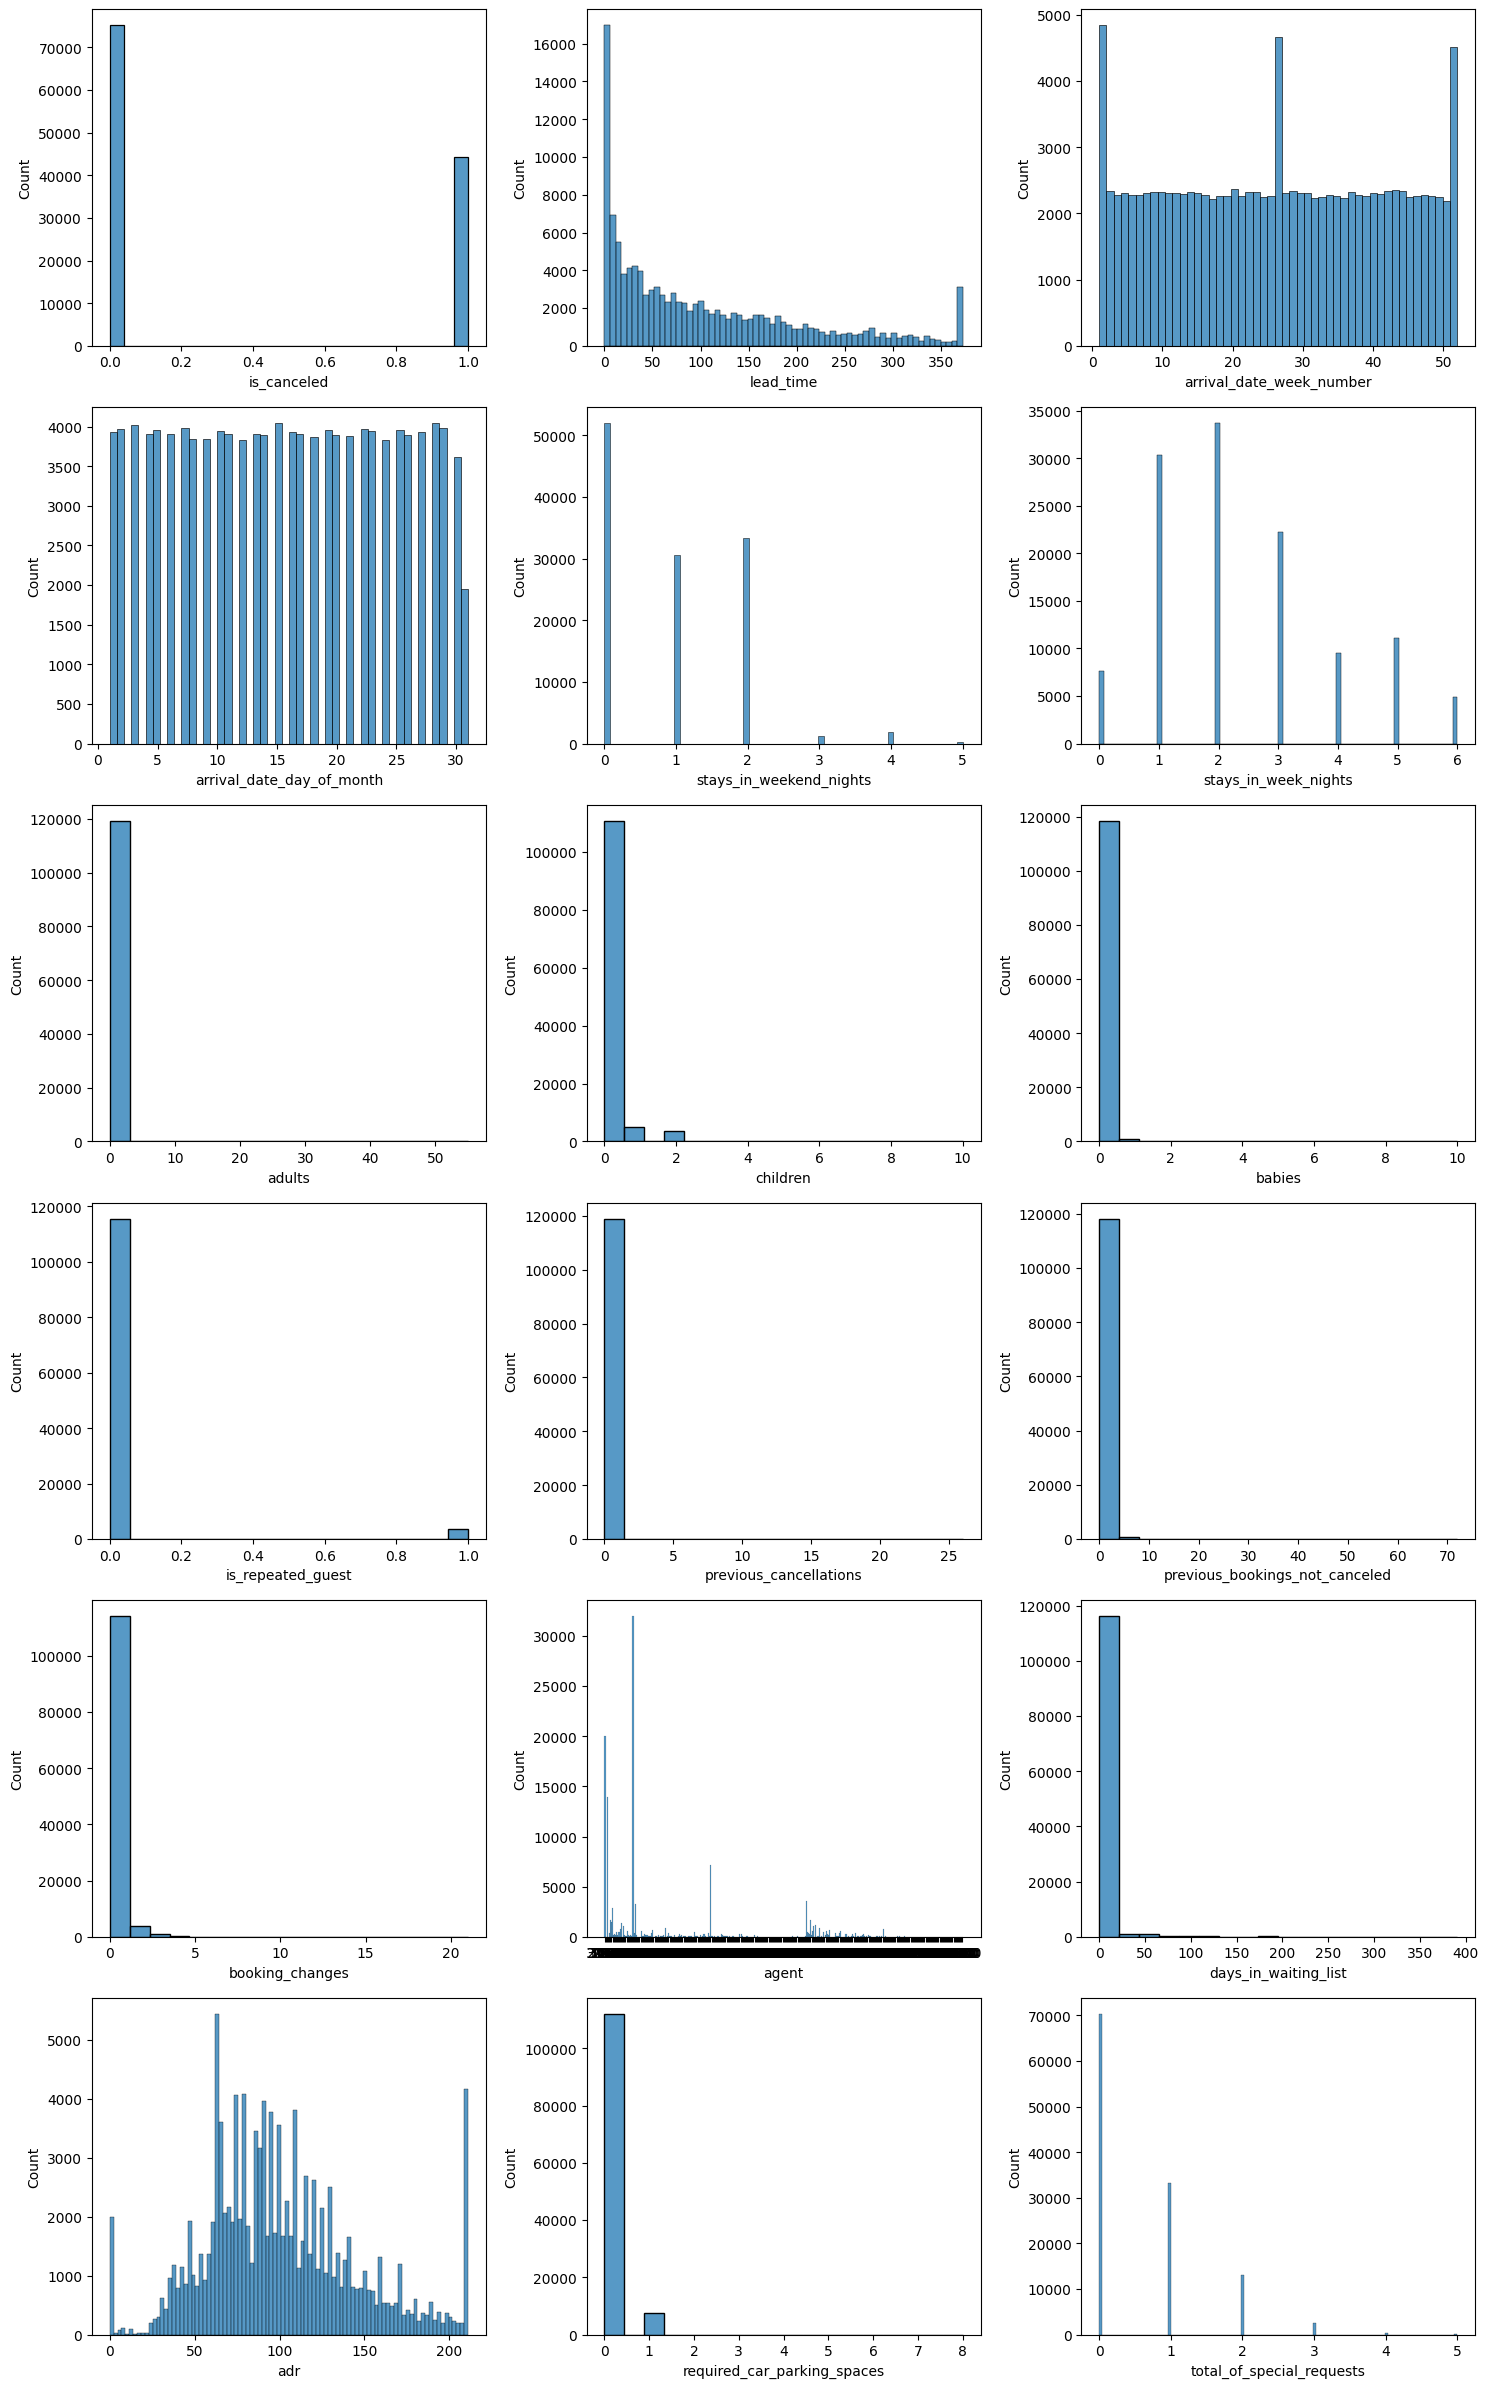

In [35]:
visualize_diagram("Histogram")

Revise these with me please guys:
- `agent` is an ID so it's boxplot may appear weird. (I believe so)

- Idk abt the last 2 features tbh: `required_car..` & `total_of_speci..` (idk if they're considered outliers in the 1st place, we didnt handle them)

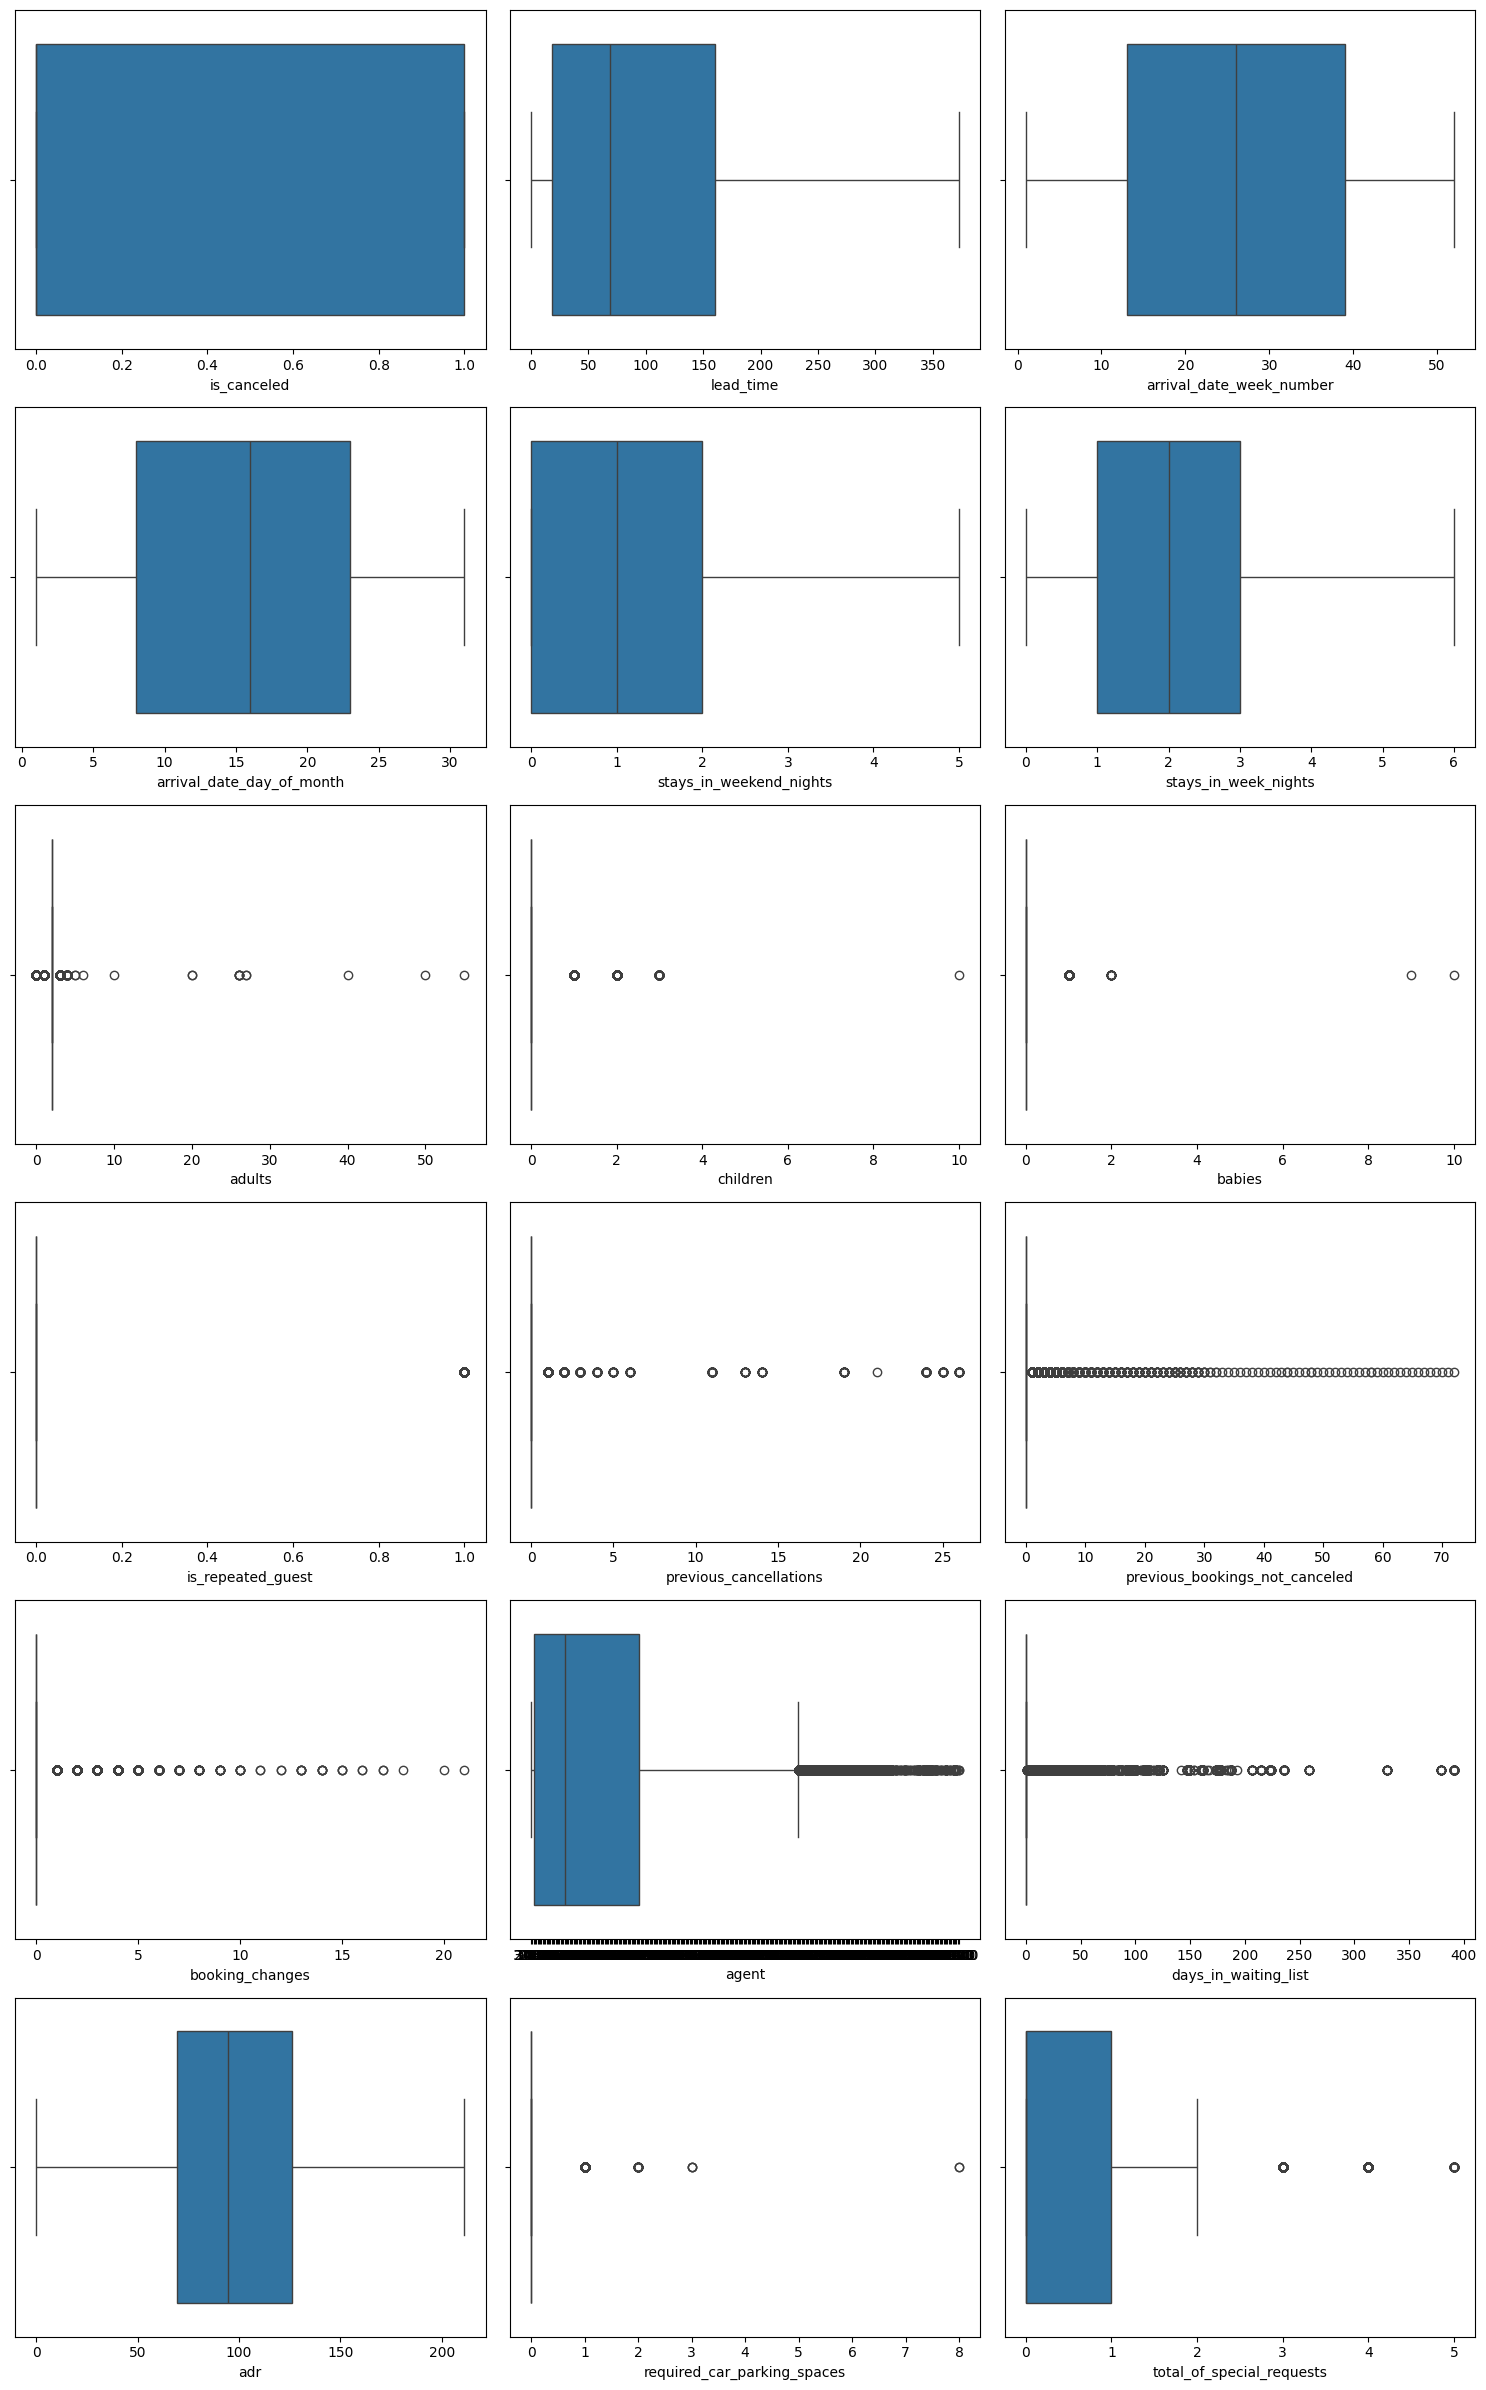

In [36]:
visualize_diagram("Boxplot")

### Remove Target Leakage Features
These features contain information that would not be available at prediction time

In [37]:
leakage_features = [
    'reservation_status',           # Final status (leaks outcome)
    'previous_cancellations',       # Historical cancellation data (leaks pattern)
    'previous_bookings_not_canceled',  # Historical booking data (leaks pattern)
    'reservation_status_date'       # Date when status was finalized (POST-booking info - CRITICAL LEAKAGE)
]

df = df.drop(columns=leakage_features)


## B. Exploratory Data Analysis (EDA)

### Distribution of Cancellations

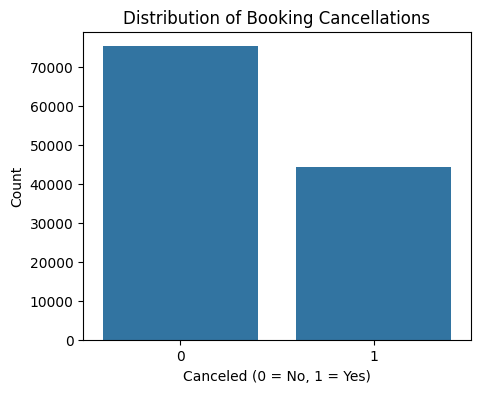

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Booking Cancellations')
plt.xlabel('Canceled (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
#Higher Number of cancellations

### Booking Trends by Month

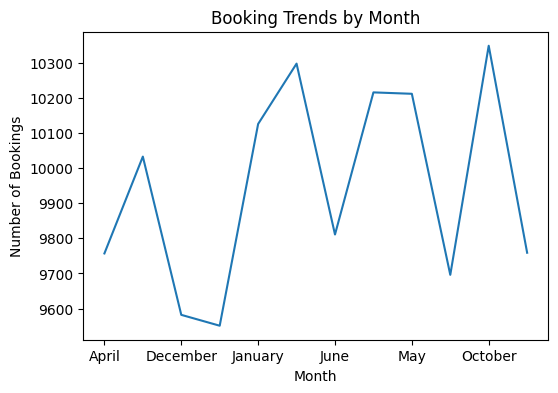

In [39]:
monthly_bookings = df.groupby('arrival_date_month').size()

plt.figure(figsize=(6,4))
monthly_bookings.plot()
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()
#Peakest Month = October
#Lowest Month = December

### Booking Trends by Week

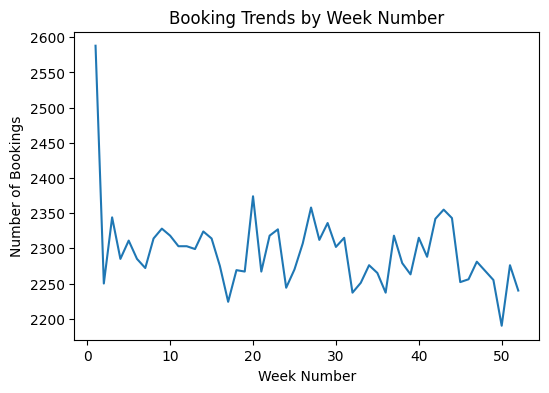

In [40]:
weekly_bookings = df.groupby('arrival_date_week_number').size()

plt.figure(figsize=(6,4))
weekly_bookings.plot()
plt.title('Booking Trends by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.show()


### Booking Trends by City

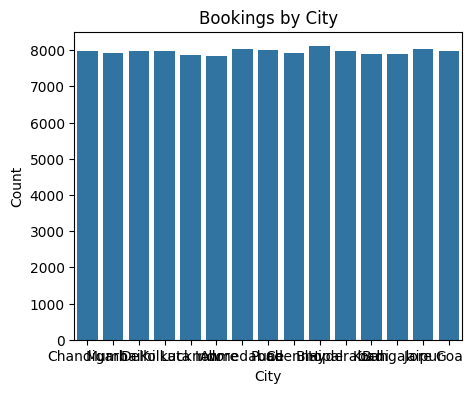

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x='city', data=df)
plt.title('Bookings by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

### ADR vs Cancellations

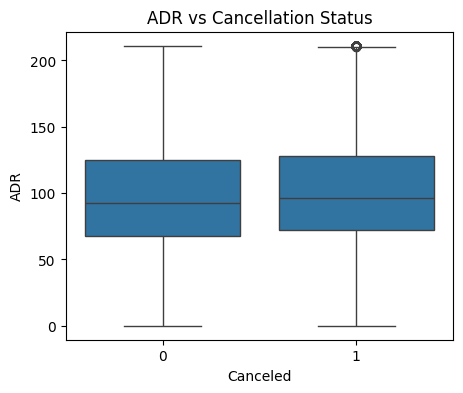

In [42]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR vs Cancellation Status')
plt.xlabel('Canceled')
plt.ylabel('ADR')
plt.show()
#Average daily rate is not a major factor for cancellations.
#The outliers indicate that a few expensive bookings were canceled

### Correlation Heatmap

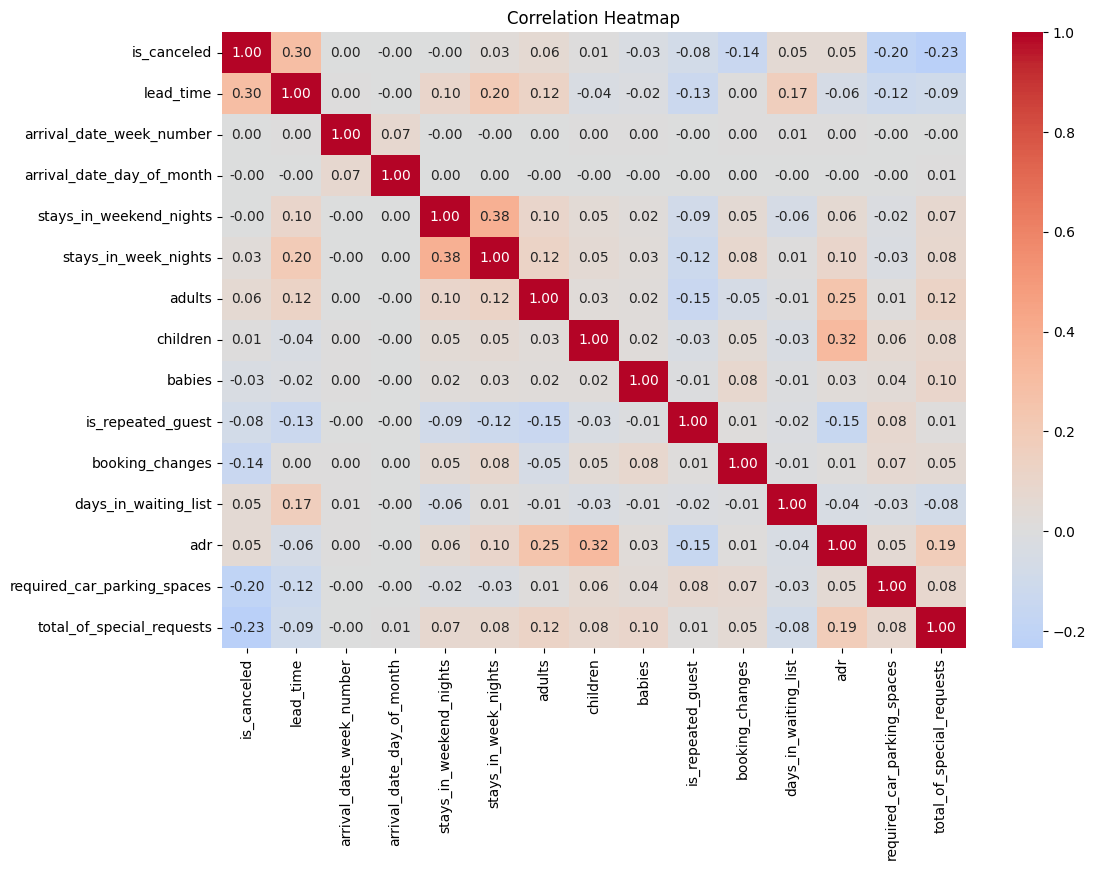

In [43]:
# Get numeric columns as a dataframe
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Lead Time Analysis

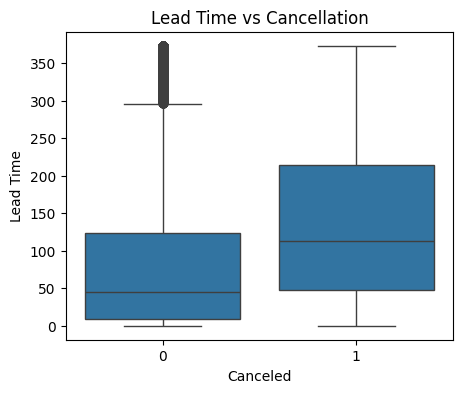

In [44]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time')
plt.show()
#Outliers → extremely early bookings that may cancel.
#people who book far in advance are more likely to cancel.

### Categorical Analysis – Hotel Type

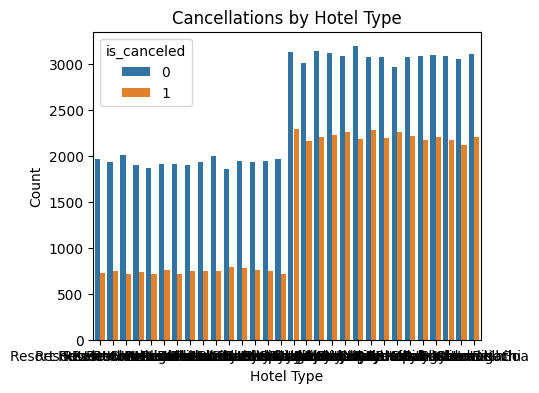

In [45]:
plt.figure(figsize=(5,4))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

### Categorical Analysis – Customer Type

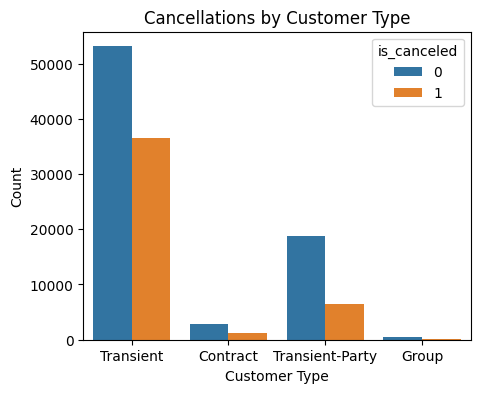

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Cancellations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


### Categorical Analysis – Market Segment

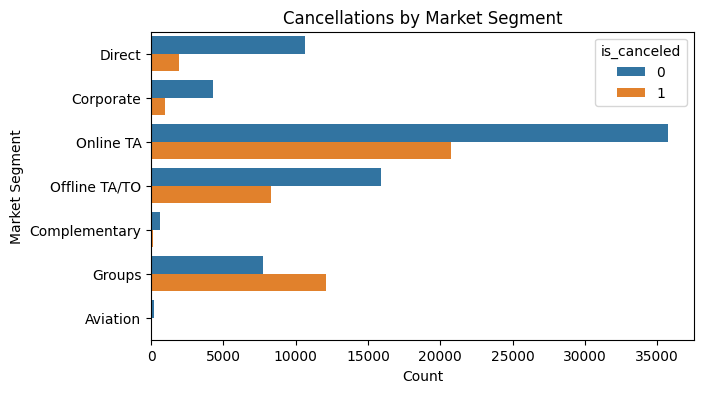

In [47]:
plt.figure(figsize=(7,4))
sns.countplot(y='market_segment', hue='is_canceled', data=df)
plt.title('Cancellations by Market Segment')
plt.xlabel('Count')
plt.ylabel('Market Segment')
plt.show()

## Convert categorical values to numerical

**Convert dates to usable features**

this line is important

**df.drop('arrival_date_month', axis=1, inplace=True)**

because we already converted the month names into numbers with this line:

**df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)**

Before dropping: You have the month in words

After mapping: The number version is enough for analysis or modeling because most algorithms don’t understand text like January. They only work with numbers

Dropping the original month name cleans the dataset, avoids duplicate information,

In [48]:
month_mapping = {
'January': 1, 'February': 2, 'March': 3, 'April': 4,
'May': 5, 'June': 6, 'July': 7, 'August': 8,
'September': 9, 'October': 10, 'November': 11, 'December': 12
}


df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)


df['is_peak_season'] = df['arrival_date_month_num'].isin([10, 5, 6]).astype(int)
df['is_month_start'] = (df['arrival_date_day_of_month'] <= 10).astype(int)
df['is_month_end'] = (df['arrival_date_day_of_month'] >= 25).astype(int)


# Drop original month name
df.drop('arrival_date_month', axis=1, inplace=True)

## D. Feature Engineering

We **extract** useful features and **create** new columns/features that could be more useful, For example:


*   total_stay = weekend + week nights
*   total_guests = adults + children + babies
*   Drop irrelevant columns: e.g., arrival_date_day_of_month (already represented by is_month_start/is_month_end)

We also should **remove** highly correlated features (r > 0.9) , but there werent highly correlated features to this extent. (nothing was highly correlated in this dataset)





In [49]:
# 1. Total stay (weekend + week nights)
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# 2. Total guests (adults + children + babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 3. Drop irrelevant columns (already represented by engineered features)
df.drop(['arrival_date_day_of_month'], axis=1, inplace=True)

In [50]:
df.head() # Scroll to the end horizontally, you'll find the new columns

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,adr,required_car_parking_spaces,total_of_special_requests,city,arrival_date_month_num,is_peak_season,is_month_start,is_month_end,total_stay,total_guests
0,Resort Hotel - Chandigarh,0,342,30,0,0,2,0,0,BB,...,0.0,0,0,Chandigarh,7,0,0,1,0,2
1,Resort Hotel - Mumbai,0,373,17,0,0,2,0,0,BB,...,0.0,0,0,Mumbai,4,0,0,1,0,2
2,Resort Hotel - Delhi,0,7,37,0,1,1,0,0,BB,...,75.0,0,0,Delhi,9,0,1,0,1,1
3,Resort Hotel - Kolkata,0,13,33,0,1,1,0,0,BB,...,75.0,0,0,Kolkata,8,0,0,0,1,1
4,Resort Hotel - Lucknow,0,14,37,0,2,2,0,0,BB,...,98.0,0,1,Lucknow,9,0,0,0,2,2


## Encoding
**Label Encoding**

 Use Label Encoding for columns with few categories or where tree-based models are used.

fit:  learns all unique categories

transform:  converts each category into an integer

**example**

Resort Hotel → 0
City Hotel   → 1

**One-Hot Encoding**

Use One-Hot Encoding for columns with many categories or where no order exists, especially for linear models.

label encoding&*One-Hot Encoding  is used for Convert categorical values to numerical

In [51]:
from sklearn.preprocessing import LabelEncoder

# Columns for Label Encoding
label_encode_cols = [
    'hotel', 'meal', 'deposit_type', 'customer_type',
    'reserved_room_type', 'assigned_room_type'
]

# Reusing the same encoder causes label mixing between columns, so adjusted the code to be new for each column
for col in label_encode_cols:
    if col in df.columns:
        le = LabelEncoder()  # New encoder for each column (so mmixing doesn't happen)
        df[col] = le.fit_transform(df[col])

one_hot_cols = ['country', 'market_segment', 'distribution_channel', 'agent', 'city']
one_hot_cols_existing = [col for col in one_hot_cols if col in df.columns]

df = pd.get_dummies(df, columns=one_hot_cols_existing, drop_first=True)


## Train/Validation/Test Split

In [52]:
x = df.drop('is_canceled', axis=1)
y = df['is_canceled']


X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
#splitting data into training -> 70%, and test -> 30%
#         Train                 Test
#     X_train, y_train      X_temp, y_temp

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
#then splitting the temporary test data further into two halves, 30% -> 15%  15%
#         Test             Validation
#     X_test, y_test      X_val, y_val

# Data after splitting 70% Training, 15% Test, 15% Validation

## Standardization
Apply Standardization on numerical data

Before Standardization (Training Data)

In [53]:
X_train.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,city_Delhi,city_Goa,city_Hyderabad,city_Indore,city_Jaipur,city_Kochi,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
62422,8,277,36,0,2,2,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
22069,27,52,22,0,2,2,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
39169,15,183,17,0,1,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6140,19,225,19,1,3,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
33105,22,0,34,0,2,2,0,0,0,1,...,False,False,True,False,False,False,False,False,False,False


Standardization (Applied AFTER train/validation/test split to avoid data leakage)

In [54]:
# CRITICAL: Fit scaler ONLY on training data, then transform all sets
# This ensures test or validation set statistics don't leak into training
scaler = StandardScaler()

# Identify numerical features (exclude target variable)
numerical_features = X_train.select_dtypes(include='number').columns.tolist()

# Fit scaler on training data ONLY
scaler.fit(X_train[numerical_features])

# Transform all datasets using the fitted scaler
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Standardization completed:")
print(f"- Training set shape: {X_train.shape}")
print(f"- Validation set shape: {X_val.shape}")
print(f"- Test set shape: {X_test.shape}")
print(f"- Numerical features standardized: {len(numerical_features)}")


Standardization completed:
- Training set shape: (83573, 556)
- Validation set shape: (17908, 556)
- Test set shape: (17909, 556)
- Numerical features standardized: 25


After Standardization

In [55]:
X_train.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,city_Delhi,city_Goa,city_Hyderabad,city_Indore,city_Jaipur,city_Kochi,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
62422,-0.481099,1.730756,0.640217,-0.952404,-0.263723,0.241661,-0.259311,-0.07784,-0.508322,-0.181032,...,False,False,False,True,False,False,False,False,False,False
22069,1.816002,-0.493822,-0.292024,-0.952404,-0.263723,0.241661,-0.259311,-0.07784,-0.508322,-0.181032,...,False,False,False,False,False,False,False,True,False,False
39169,0.365201,0.801377,-0.624967,-0.952404,-0.917306,0.241661,-0.259311,-0.07784,-0.508322,-0.181032,...,False,False,False,False,False,False,False,False,False,False
6140,0.848802,1.216631,-0.491790,0.080228,0.389860,-1.432020,-0.259311,-0.07784,-0.508322,-0.181032,...,False,False,False,False,False,False,False,False,False,False
33105,1.211502,-1.007946,0.507039,-0.952404,-0.263723,0.241661,-0.259311,-0.07784,-0.508322,5.523875,...,False,False,True,False,False,False,False,False,False,False


## E. Feature Selection using Genetic Algorithm

We'll follow the Genetic Algorithm's Life Cycle, numbered steps below.
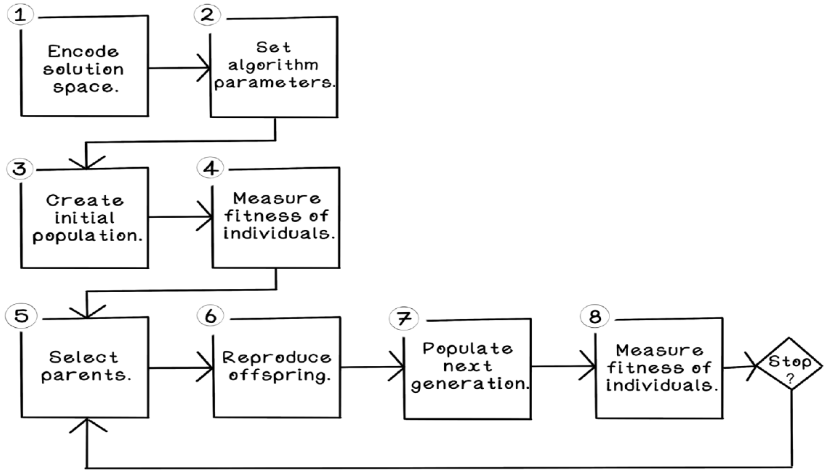


Genetic Algorithm (GA) is used here to select the optimal subset of features.
Each chromosome is a binary vector where:


*   0: feature dropped
*   1: feature selected

Fitness function:
- F1-score on validation set using Decision Tree classifier

#### 1. Encode Solution Space
Store the features (columns) in a list

In [56]:
feature_names = X_train.columns.tolist()
num_features = len(feature_names)

# Note: the following columns were one-hot encoded (so lots of columns show up)
# ['country', 'market_segment', 'distribution_channel', 'agent', 'city']

print("Number of Features BEFORE Genetic Algorithm:", num_features)

Number of Features BEFORE Genetic Algorithm: 556


In [57]:
feature_names

['hotel',
 'lead_time',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'arrival_date_month_num',
 'is_peak_season',
 'is_month_start',
 'is_month_end',
 'total_stay',
 'total_guests',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS',
 'country_AUT',
 'country_AZE',
 'country_BDI',
 'country_BEL',
 'country_BEN',
 'country_BFA',
 'country_BGD',
 'country_BGR',
 'country_BHR',
 'country_BHS',
 'country_BIH',
 'country_BLR',
 'country_BOL',
 'country_BRA',
 'country_BRB',
 'country_BWA',
 'country_CAF',
 'country_CHE',
 'country_CHL',
 'country_CHN',
 'country_CIV',
 'coun

#### 2. Set Algorithm Paramters
- POP_SIZE: Number of candidate feature subsets in each generation
- N_GENERATIONS: Number of evolutionary **iterations** (**stopping condition**)
- MUTATION_RATE: Probability of flipping a feature selection bit
- TOURNAMENT_SIZE: Number of chromosomes competing in selection

These parameters balance exploration (diversity) and exploitation
(selecting good solutions).

In [58]:
POP_SIZE = 20
N_GENERATIONS = 3
MUTATION_RATE = 0.05
TOURNAMENT_SIZE = 3

#### 3. Create Intial Population

Each chromosome is initialized randomly as a binary vector:
1 → feature selected
0 → feature excluded

Random initialization ensures diverse starting solutions.

In [59]:
def init_population():
    return [np.random.randint(0, 2, num_features) for _ in range(POP_SIZE)] # 0 (inclusive) to 2 (exclusive)

#### 4. Measure Fitness Of Individuals

The **fitness function** evaluates how good a feature subset is.

 Fitness functions are like the heuristics . They are guidelines for finding good solutions.

Steps:
1. Select features based on chromosome encoding.
2. Train a Decision Tree classifier using the **training** data.
3. Evaluate performance using F1-score on the **validation** set.

**Precision:** all the samples the model predicted as this class, how many were correct?

**Recall (Sensitivity)**: actual samples of this class, how many did the model correctly identify?

**F1-score:** Harmonic mean of precision and recall. Balances both.


**DOUBLE CHECK:**: F1-score is chosen because the dataset is imbalanced and it
balances precision and recall.


In [60]:
def fitness(chromosome):
    # 1. Select features based on chromosome encoding.
    selected_features = [feature_names[i] for i in range(num_features) if chromosome[i] == 1] # Select features that have a value of 1

    # Avoid empty feature subset (empty chromosome)
    if len(selected_features) == 0:
        return 0

    # 2. Train a Decision Tree classifier using the training data.

    # Subset data (doesn't affect the original variables, same concept for validation)
    X_train_sub = X_train[selected_features]

    # Depth Limited Decison Tree for the Genetic Algorithm (so we don't run for 24 hours)
    model = DecisionTreeClassifier(max_depth=6, random_state=42)
    model.fit(X_train_sub, y_train)

    # 3. Evaluate performance using F1-score on the validation set.
    X_val_sub = X_val[selected_features]
    preds = model.predict(X_val_sub)
    return f1_score(y_val, preds)

#### 5. Select Parents
We don't select all parents with high fitness to avoid getting stuck in a local best, thus selection techniques exist.

Tournament selection chooses parent chromosomes by:
- Randomly selecting a small group of chromosomes
- Choosing the one with the highest fitness in each group

**NOTE**: problem is enaha 'mgmoo3et el moot', a group consisting of all good solutions will only result with 1 out of the entire group

This method encourages strong solutions while maintaining diversity

In [61]:
def tournament_selection(population):
    tournament = random.sample(population, TOURNAMENT_SIZE)
    tournament_fitness = [fitness(ch) for ch in tournament]
    return tournament[np.argmax(tournament_fitness)]

#### 6. Reproduce Offsprings
**Crossover** combines two parent chromosomes to produce offspring.
A random crossover point is selected (**single-point crossover**), and genes are exchanged.
This enables exploration of new feature combinations.

In [62]:
def crossover(parent1, parent2):
    point = random.randint(1, num_features - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

**Mutation** randomly flips feature bits (0 ↔ 1) with a small probability.
This prevents premature convergence and helps explore the search space.

In [63]:
def mutation(chromosome):
    for i in range(num_features):
        if random.random() < MUTATION_RATE: # MUTATION RATE DEFINED ABOVE
            chromosome[i] = 1 - chromosome[i]
    return chromosome

#### 7. Populate the next generation
Not stated in code, however we're using a `Generational` approach: replace population with all off springs

Con: Diversity could lead to a loss of good solutions

#### Apply Genetic Algorithm
The Genetic Algorithm evolves the population over multiple generations.
In each generation:
- Parents are selected using tournament selection
- Offspring are created via crossover and mutation
- The best chromosome is tracked based on F1-score

In [64]:
# Intialize Population
population = init_population()

# Important variables to track performance by each generation
best_chromosome = None
best_fitness = 0

# Iterate over the Number Of Generations needed
for gen in range(N_GENERATIONS):
    new_population = []

    # Iterate over the population over 2, since we select 2 parents & reproduce 2 children at a time
    for _ in range(POP_SIZE // 2):
        # Select parents
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)

        # Reproduce Offsprings
        child1, child2 = crossover(parent1, parent2)

        child1 = mutation(child1)
        child2 = mutation(child2)

        new_population.extend([child1, child2])

    # Populate the next generation
    population = new_population

    # Track best solution
    for chrom in population:
        score = fitness(chrom)
        if score > best_fitness:
            best_fitness = score
            best_chromosome = chrom

    print(f"Generation {gen+1}/{N_GENERATIONS} | Best F1-score: {best_fitness:.4f}")

Generation 1/3 | Best F1-score: 0.7564
Generation 2/3 | Best F1-score: 0.7564
Generation 3/3 | Best F1-score: 0.7591


The best chromosome is decoded into actual feature names.
**Only features marked with '1' are retained.**

In [65]:
selected_features = [feature_names[i] for i in range(num_features) if best_chromosome[i] == 1]

print("\nNumber of selected features AFTER genetic algorithm:", len(selected_features))
print("Selected Features:")
for f in selected_features:
    print("-", f)



Number of selected features AFTER genetic algorithm: 308
Selected Features:
- hotel
- lead_time
- children
- meal
- is_repeated_guest
- assigned_room_type
- booking_changes
- deposit_type
- customer_type
- required_car_parking_spaces
- total_of_special_requests
- arrival_date_month_num
- is_peak_season
- is_month_start
- country_AGO
- country_AIA
- country_ALB
- country_AND
- country_ARE
- country_ARG
- country_ASM
- country_ATA
- country_AUS
- country_AZE
- country_BLR
- country_BRA
- country_BRB
- country_BWA
- country_CAF
- country_CN
- country_COL
- country_COM
- country_CPV
- country_CRI
- country_CYM
- country_CYP
- country_DJI
- country_DMA
- country_DZA
- country_EGY
- country_FJI
- country_GAB
- country_GBR
- country_GEO
- country_GGY
- country_GIB
- country_GLP
- country_GUY
- country_HND
- country_HRV
- country_HUN
- country_IDN
- country_IMN
- country_IND
- country_IRN
- country_IRQ
- country_ISL
- country_JAM
- country_JEY
- country_JPN
- country_KEN
- country_KHM
- count

Training, validation, and test datasets are reduced to include
only the GA-selected features. These datasets are used for
final model training and evaluation.

## C. Checking Data Balance

In [66]:
# Count and percentage of each class
target_counts = df['is_canceled'].value_counts()
print(target_counts)
print("\nPercentage:\n", target_counts / len(df) * 100)


is_canceled
0    75166
1    44224
Name: count, dtype: int64

Percentage:
 is_canceled
0    62.958372
1    37.041628
Name: count, dtype: float64


Slightly imbalanced, so use **SMOTE** could help improve model performance, especially for the minority class predictions.

## SMOTE (synthetic minority oversampling technique)

is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by **replicating** them. SMOTE synthesises new minority instances between existing minority instances. (not duplicates, just similiar)

But for the SMOTE to operate we have to make it first on the train no test ( to avoid overfitting)

**We divided the data into 70% Train,15% Test, and 15% Validation**

In [67]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)
# minority class/label will be resampled until it reaches 70% of the majority class size.

#resampled
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_res = pd.Series(y_train_res, name='is_canceled')

# Display target distribution before and after SMOTE
print("Original training target distribution:", y_train.value_counts())
print("After SMOTE (training set only)", y_train_res.value_counts())

# Percentages
target_counts = y_train_res.value_counts()
print("Percentage after SMOTE (training set only):", (target_counts / len(y_train_res) * 100).round(2))

Original training target distribution: is_canceled
0    52616
1    30957
Name: count, dtype: int64
After SMOTE (training set only) is_canceled
0    52616
1    36831
Name: count, dtype: int64
Percentage after SMOTE (training set only): is_canceled
0    58.82
1    41.18
Name: count, dtype: float64


Create the data with the selected features ONLY & smote applied

In [68]:
X_train_ga = X_train_res[selected_features]
X_val_ga = X_val[selected_features]
X_test_ga = X_test[selected_features]


## Model Performance Comparison: ALL Features vs GA-Selected Features

This allows us to compare performance with and without feature selection

Metrics:

  **Precision:** all the samples the model predicted as this class, how many were correct?

  **Recall (Sensitivity)**:actual samples of this class, how many did the model correctly identify?

  **F1-score:** Harmonic mean of precision and recall. Balances both.

  **Accuracy:** Overall fraction of correct predictions

  **Macro avg:** Equal-weight average across classes.

  **Weighted avg:** Average across classes, weighted by class size.


### Train models on ALL features (before GA feature selection)


Notice the use of `X_train_res` & `y_train_res`, they have SMOTE applied data with ALL features

In [69]:
models_all_features = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

results_all_features = []

print("MODEL PERFORMANCE WITH ALL FEATURES")
print(f"Total features: {X_train_res.shape[1]}\n")

for name, model in models_all_features.items():
    # Train using the training data
    model.fit(X_train_res, y_train_res)

    # Test the model againist the TRAINING data - see how well the model learned the training data
    train_preds = model.predict(X_train_res)

    # Test the model againist the VALIDATION data
    val_preds = model.predict(X_val)

    # Training Accuracy
    train_acc = accuracy_score(y_train_res, train_preds)
    train_f1 = f1_score(y_train_res, train_preds)

    # Validation Accuracy
    val_acc = accuracy_score(y_val, val_preds)
    val_f1 = f1_score(y_val, val_preds)

    results_all_features.append({
        "Model": name,
        "Train_Acc": round(train_acc, 4),
        "Train_F1": round(train_f1, 4),
        "Val_Acc": round(val_acc, 4),
        "Val_F1": round(val_f1, 4)
    })

    print(f"{name}:")
    print(f"  Training   - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
    print(f"  Validation - Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}\n")

results_df_all = pd.DataFrame(results_all_features)
print(results_df_all.to_string(index=False))


MODEL PERFORMANCE WITH ALL FEATURES
Total features: 556

KNN:
  Training   - Accuracy: 0.8814, F1: 0.8573
  Validation - Accuracy: 0.7942, F1: 0.7233

Decision Tree:
  Training   - Accuracy: 0.8477, F1: 0.8085
  Validation - Accuracy: 0.8393, F1: 0.7758

Neural Network (MLP):
  Training   - Accuracy: 0.9059, F1: 0.8857
  Validation - Accuracy: 0.8542, F1: 0.8027

               Model  Train_Acc  Train_F1  Val_Acc  Val_F1
                 KNN     0.8814    0.8573   0.7942  0.7233
       Decision Tree     0.8477    0.8085   0.8393  0.7758
Neural Network (MLP)     0.9059    0.8857   0.8542  0.8027


### Train models on SELECTED features (after GA feature selection)

Notice the use of `X_train_ga` & `y_train_ga`, have SMOTE applied & SELECTED Features ONLY


In [70]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

results_ga = []

print("\nMODEL PERFORMANCE WITH GA-SELECTED FEATURES")
print(f"Selected features: {len(selected_features)} ({((X_train_res.shape[1] - len(selected_features)) / X_train_res.shape[1] * 100):.1f}% reduction)\n")

for name, model in models.items():
    # Train using the training data (with selected features)
    model.fit(X_train_ga, y_train_res)

    # Test the model againist the TRAINING data - see how well the model learned the training data
    train_preds = model.predict(X_train_ga)

    # Test the model againist the VALIDATION data
    val_preds = model.predict(X_val_ga)

    # Training Accurracy
    train_acc = accuracy_score(y_train_res, train_preds)
    train_f1 = f1_score(y_train_res, train_preds)

    # Validation Accuracy
    val_acc = accuracy_score(y_val, val_preds)
    val_f1 = f1_score(y_val, val_preds)

    results_ga.append({
        "Model": name,
        "Train_Acc": round(train_acc, 4),
        "Train_F1": round(train_f1, 4),
        "Val_Acc": round(val_acc, 4),
        "Val_F1": round(val_f1, 4)
    })

    print(f"{name}:")
    print(f"  Training   - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
    print(f"  Validation - Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}\n")

results_df_ga = pd.DataFrame(results_ga)
print(results_df_ga.to_string(index=False))


MODEL PERFORMANCE WITH GA-SELECTED FEATURES
Selected features: 308 (44.6% reduction)

KNN:
  Training   - Accuracy: 0.8774, F1: 0.8484
  Validation - Accuracy: 0.8085, F1: 0.7335

Decision Tree:
  Training   - Accuracy: 0.8445, F1: 0.7996
  Validation - Accuracy: 0.8377, F1: 0.7672

Neural Network (MLP):
  Training   - Accuracy: 0.8720, F1: 0.8442
  Validation - Accuracy: 0.8410, F1: 0.7856

               Model  Train_Acc  Train_F1  Val_Acc  Val_F1
                 KNN     0.8774    0.8484   0.8085  0.7335
       Decision Tree     0.8445    0.7996   0.8377  0.7672
Neural Network (MLP)     0.8720    0.8442   0.8410  0.7856


## Evaluation on TESTING Data
Evaluate all models on TEST SET (unseen data)
This gives us an unbiased estimate of real-world performance

Test set size: 17909 samples

KNN - Test Set Performance:
  Accuracy:  0.8105
  Precision: 0.7608
  Recall:    0.7124
  F1-Score:  0.7358
  Confusion Matrix:
  [[9789 1486]
 [1908 4726]]



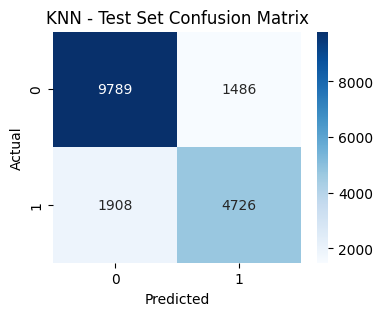

Decision Tree - Test Set Performance:
  Accuracy:  0.8408
  Precision: 0.8286
  Recall:    0.7190
  F1-Score:  0.7699
  Confusion Matrix:
  [[10288   987]
 [ 1864  4770]]



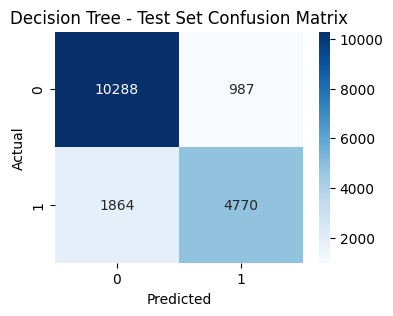

Neural Network (MLP) - Test Set Performance:
  Accuracy:  0.8438
  Precision: 0.7905
  Recall:    0.7869
  F1-Score:  0.7887
  Confusion Matrix:
  [[9892 1383]
 [1414 5220]]



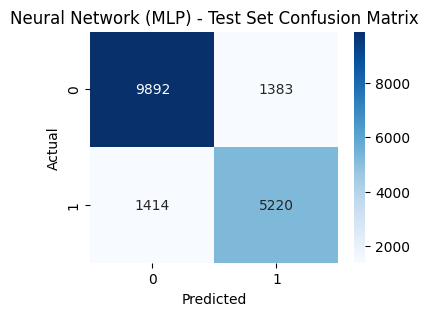


TEST SET RESULTS SUMMARY
               Model  Test_Accuracy  Test_Precision  Test_Recall  Test_F1
                 KNN         0.8105          0.7608       0.7124   0.7358
       Decision Tree         0.8408          0.8286       0.7190   0.7699
Neural Network (MLP)         0.8438          0.7905       0.7869   0.7887


In [73]:
test_results = []

print(f"Test set size: {X_test_ga.shape[0]} samples\n")

for name, model in models.items():
    # Make predictions on test set
    test_preds = model.predict(X_test_ga)

    # Compute all metrics
    test_acc = accuracy_score(y_test, test_preds)
    test_prec = precision_score(y_test, test_preds)
    test_rec = recall_score(y_test, test_preds)
    test_f1 = f1_score(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    # Store results
    test_results.append({
        "Model": name,
        "Test_Accuracy": round(test_acc, 4),
        "Test_Precision": round(test_prec, 4),
        "Test_Recall": round(test_rec, 4),
        "Test_F1": round(test_f1, 4)
    })

    # Print results
    print(f"{name} - Test Set Performance:")
    print(f"  Accuracy:  {test_acc:.4f}")
    print(f"  Precision: {test_prec:.4f}")
    print(f"  Recall:    {test_rec:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")
    print(f"  Confusion Matrix:")
    print(f"  {test_cm}")
    print()

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Test Set Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Create results DataFrame
test_results_df = pd.DataFrame(test_results)
print("\n" + "=" * 70)
print("TEST SET RESULTS SUMMARY")
print("=" * 70)
print(test_results_df.to_string(index=False))
